# Data visualization for correlation coefficient and p-value

This is a exploratory visualization for comprehensive insights.  
First, we compared coefficient of features we use to cancer incidence, this part is similar to what we did in R part. Then we use the same method in cancer mortality. We also found the number of female cancer is relatively small, while children features are more like related to female. We chose female data in all kinds of cancers, and compare their relation to children features. 

In [1]:
using CSV, DataFrames, Plots
# Path of correlation data

cor_incidence_path = "data/correlation_result/cor_incidence.csv"
cor_incidence = CSV.File(cor_incidence_path) |> DataFrame

Row,cancer,category,rf,cor,pvalue,p.adj,sign,group,group2
,String31,String15,String,Float64,Float64,Float64,String3,String15,String
1,Bladder,Air quality,PM10_concentration_max,-0.00663616,0.95107,0.95107,neg,Social,Air quality
2,Bladder,Air quality,PM10_concentration_mean,0.0162569,0.880502,0.95107,pos,Social,Air quality
3,Bladder,Air quality,PM2.5_concentration_max,-0.16593,0.163621,0.327242,neg,Social,Air quality
4,Bladder,Air quality,PM2.5_concentration_mean,-0.241393,0.0410764,0.164306,neg,Social,Air quality
5,Breast,Air quality,PM10_concentration_max,-0.0588118,0.586244,0.63866,neg,Social,Air quality
6,Breast,Air quality,PM10_concentration_mean,0.05075,0.63866,0.63866,pos,Social,Air quality
7,Breast,Air quality,PM2.5_concentration_max,-0.184157,0.12149,0.242979,neg,Social,Air quality
8,Breast,Air quality,PM2.5_concentration_mean,-0.27818,0.0179798,0.0719193,neg,Social,Air quality
9,Colorectal,Air quality,PM10_concentration_max,0.298257,0.00476606,0.00953211,pos,Social,Air quality


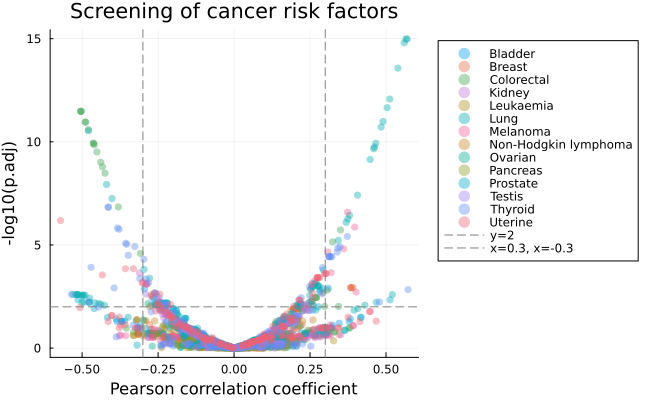

In [7]:
# Correlation Coefficient and P_value in each feature and cancer. X-axis is coefficient, and y-axis is logarithmized p-value - 
# the bigger in y-value means the higher correlation. The dashed line means how we select significant features in particular cancer.
scatter(cor_incidence.cor, -log10.(cor_incidence[!,"p.adj"]), group=cor_incidence.cancer, xlabel="Pearson correlation coefficient", ylabel="-log10(p.adj)", title="Screening of cancer risk factors",
markershape=:circle, markerstrokewidth=0, alpha=0.4, markerstrokealpha=0, size=(650, 400), legend=:outertopright)
hline!([2], color=:gray, linestyle=:dash, label="y=2") 
vline!([0.3, -0.3], color=:gray, linestyle=:dash, label="x=0.3, x=-0.3") 